In [98]:
# from google.colab import drive
# drive.mount('/content/drive')

In [99]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
# hs_df=pd.read_csv('/content/drive/My Drive/housing.csv')
hs_df = pd.read_csv('housing.csv')

id  : Row Identifier </br>
url  : Listing url</br>
region  : Region in State</br>
region_url  : URL of region</br>
price  : Price in Dollars</br>
type  : Housing type for example apartment/house etc</br>
sqfeet : Square footage </br>
beds  : Bedrooms</br>
baths  : Bathrooms</br>
cats_allowed : Pet allowed bool value</br>  
dogs_allowed  : Pet allowed bool value</br>
smoking_allowed  : smoking allowed for tenants</br>
wheelchair_access  : access for wheelchair</br>
electric_vehicle_charge : charging point bool value</br> 
comes_furnished  : furnished bool value</br>
laundry_options  : Laundry options</br>
parking_options  : Parking options</br>
image_url  : Flat image URL</br>
description  : Desctiption of house</br>
lat  : Latitude</br>
long : Longitude </br>
state : State codes</br>

In [101]:
hs_df.head(5)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [102]:
print('Laundry Options')
print(30*'-')
display(hs_df.laundry_options.value_counts())
print('\nParking Option')
print(30*'-')
hs_df.parking_options.value_counts()

Laundry Options
------------------------------


w/d in unit           131783
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64


Parking Option
------------------------------


off-street parking    128502
attached garage        40591
carport                38955
detached garage        16940
street parking         15951
no parking              3188
valet parking            163
Name: parking_options, dtype: int64

In [103]:
hs_df.isna().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [104]:
hs_df['laundry_options']=hs_df['laundry_options'].fillna('N/A') # Fill Null values with default value
hs_df['parking_options']=hs_df['parking_options'].fillna('N/A')
print("Total number of missing values")
print(30 * "-")
print(hs_df.isna().sum())
print(30 * "-")

Total number of missing values
------------------------------
id                            0
url                           0
region                        0
region_url                    0
price                         0
type                          0
sqfeet                        0
beds                          0
baths                         0
cats_allowed                  0
dogs_allowed                  0
smoking_allowed               0
wheelchair_access             0
electric_vehicle_charge       0
comes_furnished               0
laundry_options               0
parking_options               0
image_url                     0
description                   2
lat                        1918
long                       1918
state                         0
dtype: int64
------------------------------


### Perform or operation to create new feature for pets allowed as they are highly corelated

In [105]:
hs_df['pets_allowed'] = np.logical_or(hs_df['cats_allowed'], hs_df['dogs_allowed'])
hs_df['pets_allowed'] = hs_df['pets_allowed'].astype(int)
hs_df[['cats_allowed','dogs_allowed','pets_allowed']]

,cats_allowed,dogs_allowed,pets_allowed
0,1,1,1
1,0,0,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
384972,1,1,1
384973,1,1,1
384974,1,1,1
384975,1,1,1


In [106]:
data = hs_df[['id', 'region', 'price', 'type','sqfeet','beds','baths','pets_allowed','smoking_allowed','wheelchair_access','electric_vehicle_charge', 'comes_furnished','laundry_options', 'parking_options', 'state']]

In [107]:
data.set_index('id')

,region,price,type,sqfeet,beds,baths,pets_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
id,,,,,,,,,,,,,,
7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,0,0,0,0,w/d in unit,carport,ca
7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,w/d hookups,carport,ca
7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,0,0,0,w/d in unit,attached garage,ca
7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,0,0,0,w/d in unit,carport,ca
7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,0,1,laundry on site,N/A,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049053337,reno / tahoe,1295,apartment,957,2,2.0,1,1,0,0,0,w/d in unit,carport,ca
7049052968,reno / tahoe,1549,apartment,1034,2,2.0,1,0,0,0,0,w/d in unit,N/A,ca
7049050454,reno / tahoe,1249,apartment,840,2,1.0,1,1,0,0,0,laundry on site,off-street parking,ca


### Removing Outliers
<p>We can see there are "0" values present in the column of price and sq feet
According to zoning regulations, the minimum square footage for a house is 120 square feet (single room house).
so we can remove the entries which are below 120
The sq feet for a big houses can be around 5,000 sqfeeet at the maximum
so we can remove the values above 5,000
so we can have the values above 100 for price and less than 10,000 as the minimum sq feet is 120 and maximum is 5,000.
At the maximum a person can pay 10,000 dollars as rent, if above that means he may buy his own house and pay the EMI rather than paying rent monthly.¶</p>

In [108]:
outlier = ((data["sqfeet"]<120) | (data["sqfeet"]>5000) | (data["price"]<100) | (data["price"]>10000))

In [109]:
data = data[~outlier]
data

,id,region,price,type,sqfeet,beds,baths,pets_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,7049044568,reno / tahoe,1148,apartment,1078,3,2.0,1,0,0,0,0,w/d in unit,carport,ca
1,7049047186,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,w/d hookups,carport,ca
2,7043634882,reno / tahoe,1813,apartment,1683,2,2.0,1,1,0,0,0,w/d in unit,attached garage,ca
3,7049045324,reno / tahoe,1095,apartment,708,1,1.0,1,1,0,0,0,w/d in unit,carport,ca
4,7049043759,reno / tahoe,289,apartment,250,0,1.0,1,1,1,0,1,laundry on site,N/A,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384972,7049053337,reno / tahoe,1295,apartment,957,2,2.0,1,1,0,0,0,w/d in unit,carport,ca
384973,7049052968,reno / tahoe,1549,apartment,1034,2,2.0,1,0,0,0,0,w/d in unit,N/A,ca
384974,7049050454,reno / tahoe,1249,apartment,840,2,1.0,1,1,0,0,0,laundry on site,off-street parking,ca
384975,7049050149,reno / tahoe,1429,apartment,976,2,2.0,1,1,0,0,0,w/d in unit,carport,ca


# EDA

In [110]:
data[['price', 'price', 'sqfeet', 'beds', 'baths']].describe()

,price,price,sqfeet,beds,baths
count,381248.000000,381248.000000,381248.000000,381248.000000,381248.000000
mean,1186.725648,1186.725648,993.650815,1.900994,1.479784
std,589.242572,589.242572,377.133131,3.115324,0.611321
min,100.000000,100.000000,120.000000,0.000000,0.000000
25%,813.000000,813.000000,750.000000,1.000000,1.000000
50%,1041.000000,1041.000000,950.000000,2.000000,1.000000
75%,1399.000000,1399.000000,1150.000000,2.000000,2.000000
max,10000.000000,10000.000000,5000.000000,1100.000000,75.000000


There doesn't appear to be any usefull correlations, with baths and beds having an (obvious) positive correlation.

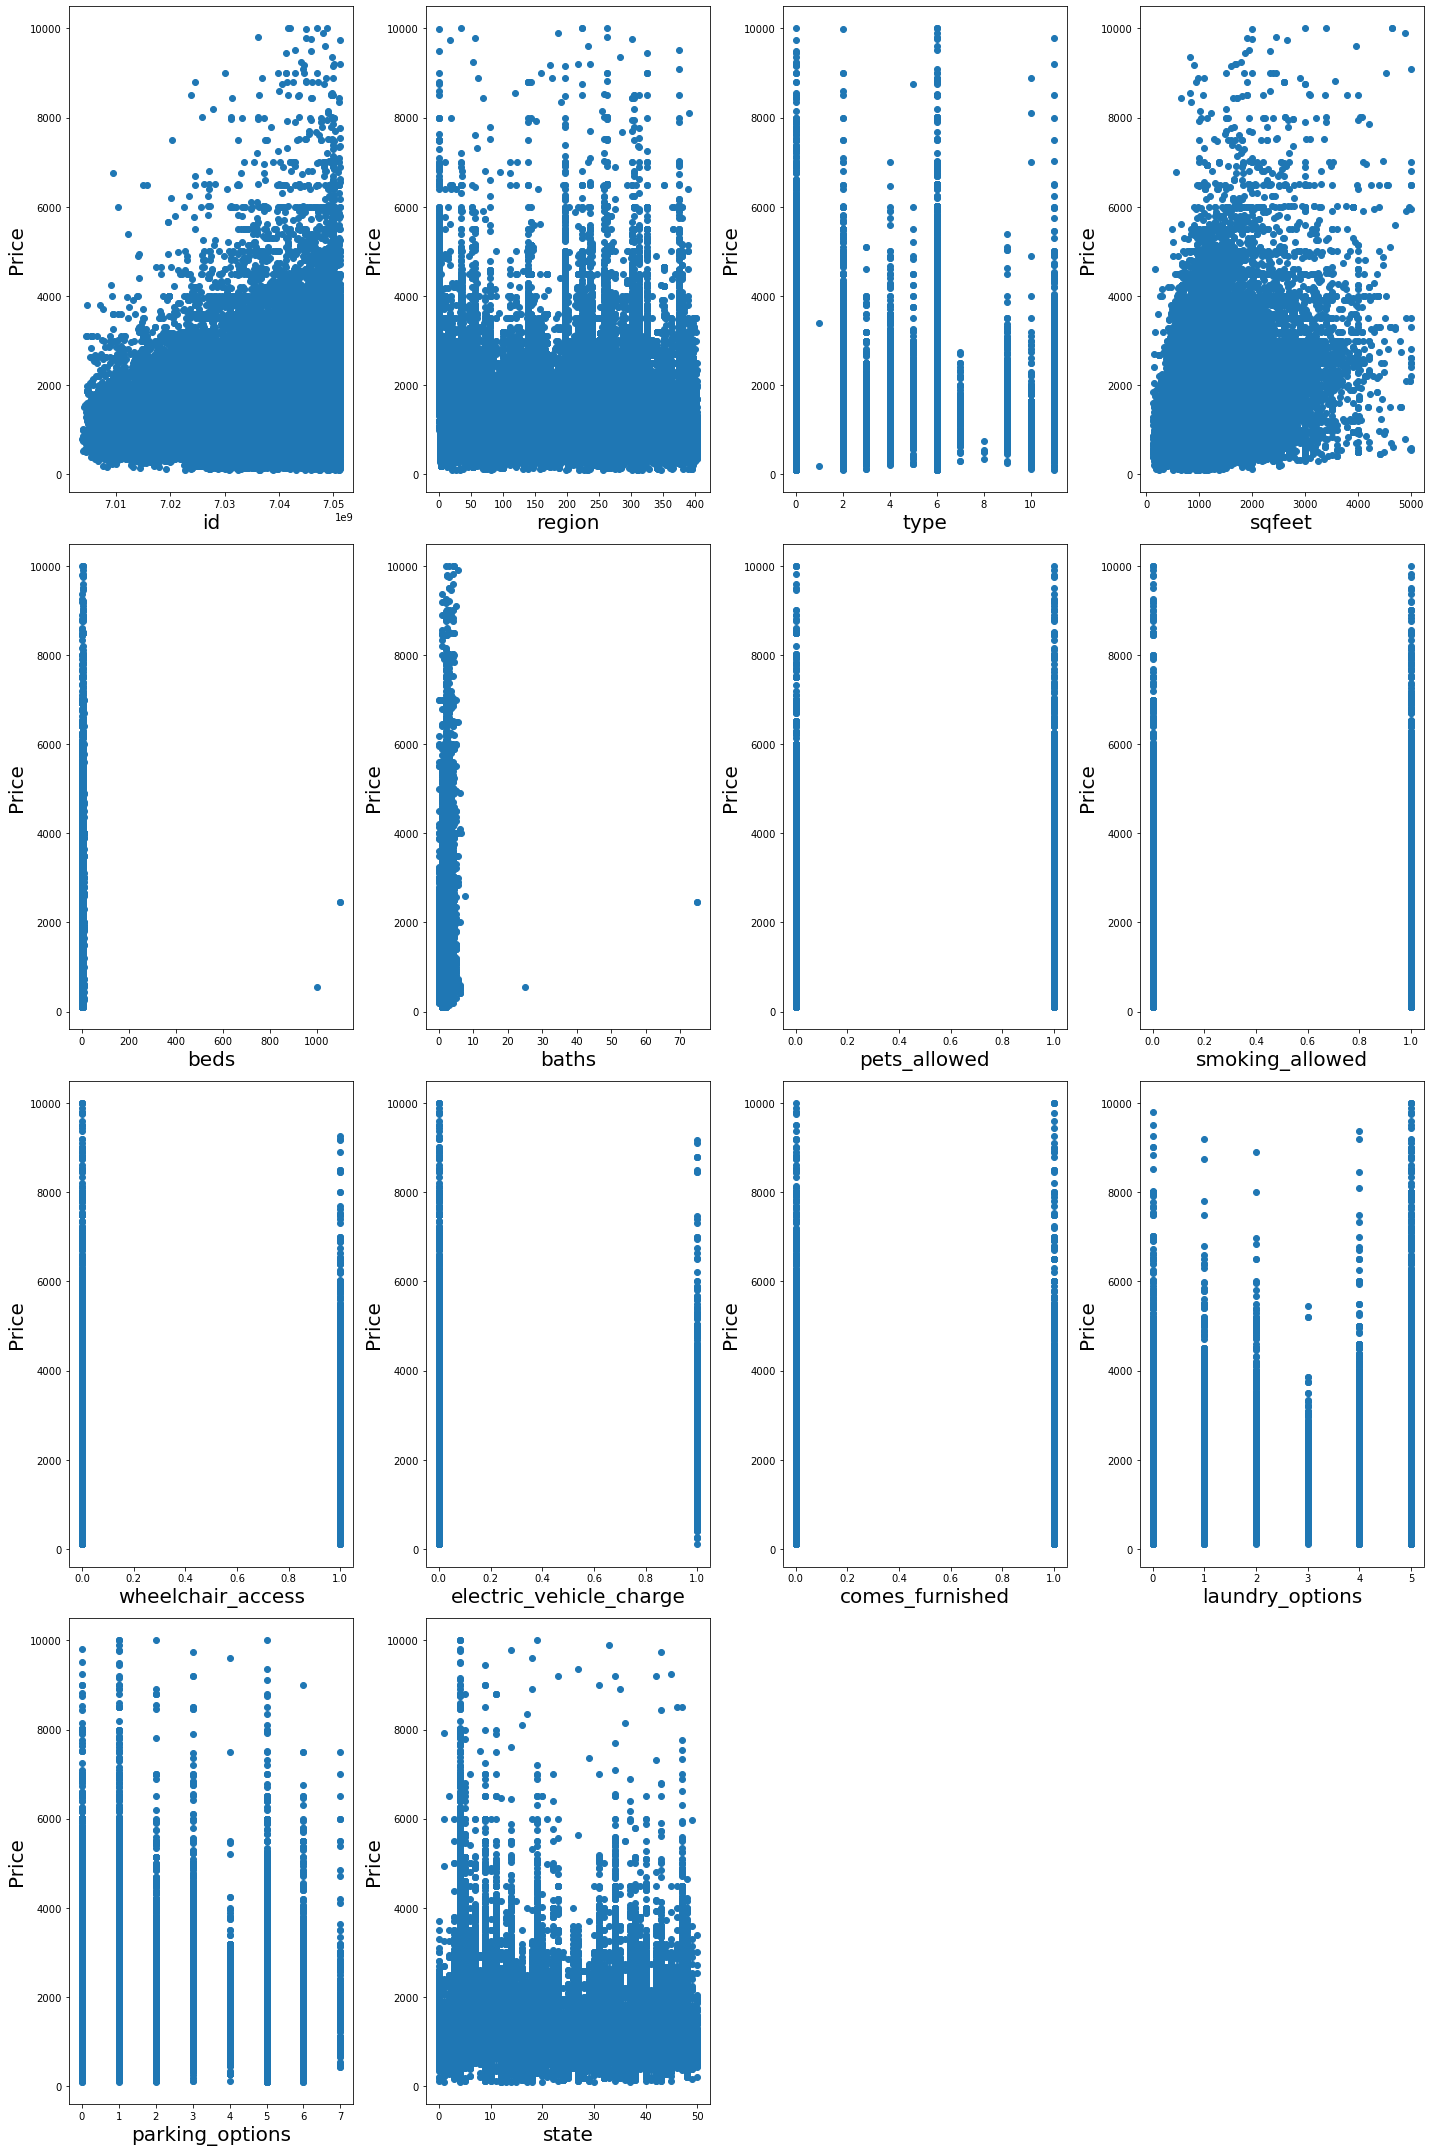

In [123]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
db=data

db["region"]=le.fit_transform(data["region"])
db["state"]=le.fit_transform(data["state"])
db["type"]=le.fit_transform(data["type"])
db["laundry_options"]=le.fit_transform(data["laundry_options"])
db["parking_options"]=le.fit_transform(data["parking_options"])

x=db.drop(columns=["price"])
y=db["price"]

plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

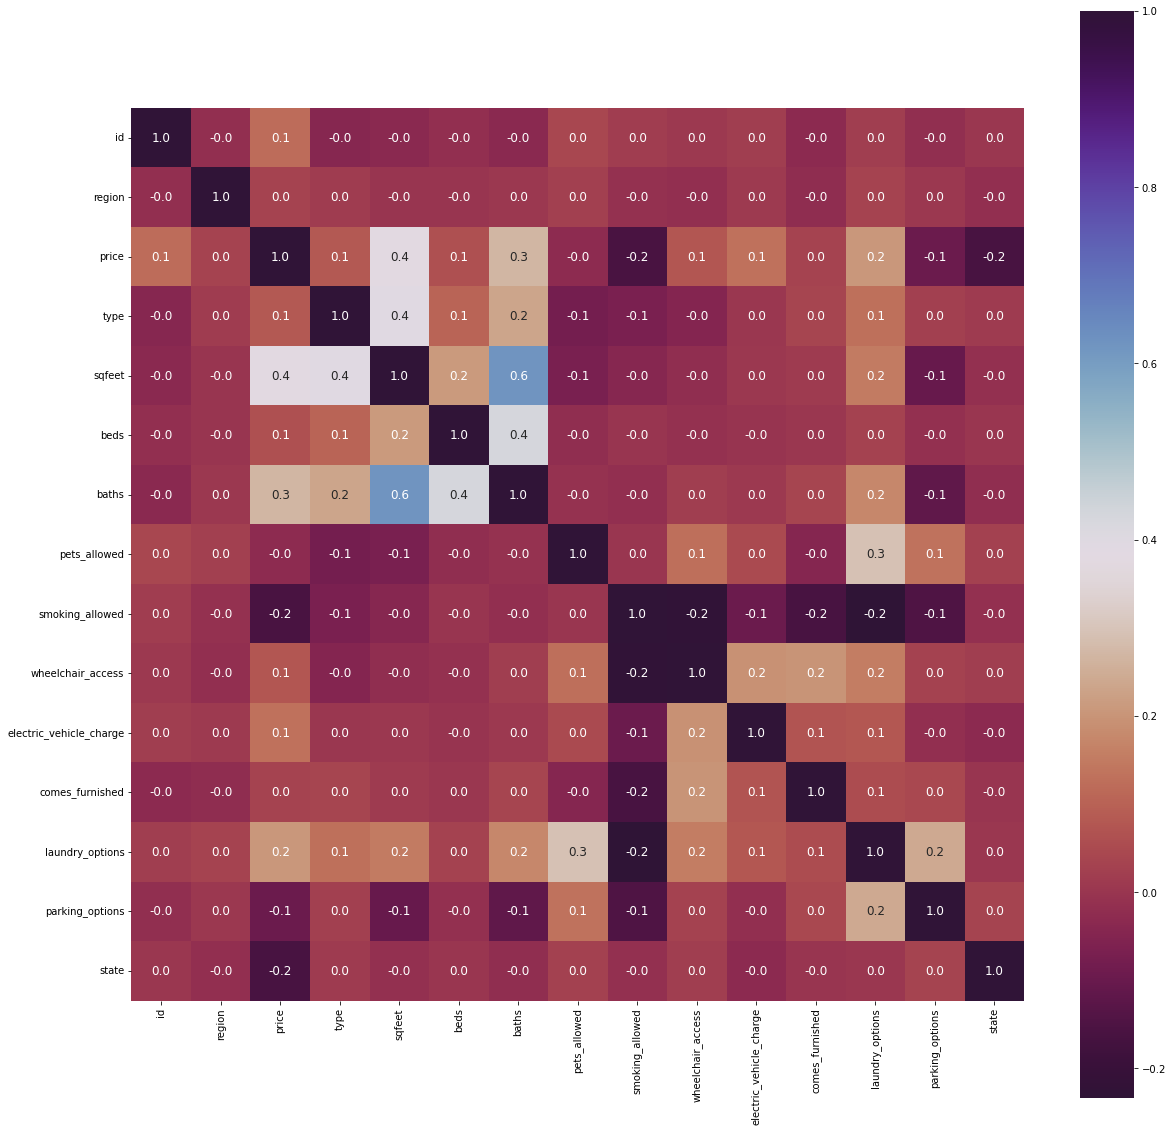

In [132]:
# Check for multicolinearity

corrl = db.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrl, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':12}, cmap='twilight_shifted_r')

### Dataset Split

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30,random_state=470)

In [134]:
# Model creation
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
dtr = DecisionTreeRegressor()
ran = RandomForestRegressor(n_estimators=90)
lin = LinearRegression()
models = {"Decision tree" : dtr,
          "Random forest" : ran,
          "Linear Regression" : lin}
scores= { }
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Random forest,0.804457
Decision tree,0.631465
Linear Regression,0.250037


### Model Evaluation

In [137]:
from sklearn import metrics

y_pred=ran.predict(x_test)

print('R^2:',metrics.r2_score(y_test, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.8044566497266772
Adjusted R^2: 0.8044463910613802
MAE: 104.48811613033799
MSE: 68151.68807361597
RMSE: 261.05878279348497
